**Abstract:**
**This project involves the development and training of a Convolutional Neural Network (CNN) for the classification of image data, focusing on digit recognition. The dataset consists of images represented as pixel values, with corresponding labels indicating the correct digit class. The neural network is designed with multiple convolutional layers to extract hierarchical features from the images, followed by fully connected layers for classification. The model is trained using the Adam optimizer and evaluated on a test set to measure accuracy. Data preprocessing steps, including feature normalization, reshaping, padding, and one-hot encoding of labels, are performed to ensure compatibility with the CNN model. The final performance of the model achieves an accuracy of 93.76% on the test dataset, demonstrating the effectiveness of the proposed network for digit classification tasks**ks

**Objective:**
**The objective of this project is to build and train a Convolutional Neural Network (CNN) to classify images of digits based on their pixel values.**

**Key objectives include:**

**Preprocessing: Properly preparing the data by reshaping images, normalizing pixel values, and converting labels into a categorical format.**

**Model Design: Constructing a CNN with multiple convolutional layers for feature extraction, followed by dense layers for classification.**

**Training and Optimization: Using the Adam optimizer and categorical cross-entropy loss function to train the model while minimizing overfitting using dropout and early stopping techniques.**

**Evaluation: Assessing model performance on a test set and visualizing predictions to validate its generalization ability.**

**Analysis: Achieving and reporting high classification accuracy and demonstrating the model's effectiveness in recognizing digits from image data.**

**This code imports necessary libraries and modules for building and training a Convolutional Neural Network (CNN) for image classification**.
**Key libraries include**ee:

NumPy and Pandas for data manipulat
ion.
Matplotlib for visualizat
ions.
TensorFlow and Keras for building and training the neural network, including layers like Conv2D, MaxPooling2D, Dense, and regularization techniques like Dropout and BatchNormaliz
ation.
Scikit-learn for data splitting and preprocessing functions like train_test_split and to_categ
orical.
Adam optimizer and EarlyStopping for model training ander

ptimiz**These libraries together facilitate data preparation, model construction, and evaluation for a deep learning-based image classificat.on task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import os

# Path to the dataset folder
dataset_path = '/kaggle/input/tmnist-alphabet-94-characters'

# List all files in the dataset folder
dataset_files = os.listdir(dataset_path)

# Print the files in the dataset folder
print("Files in dataset directory:")
for file in dataset_files:
    print(file)


Files in dataset directory:
94_character_TMNIST.csv


**About Dataset** 
Typography MNIST (TMNIST)

MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '', ']', '^', '_', '`', '{', '|', '}', '~'}

This repository contains a single csv .file. The structure of the csv file is:

the first row contains column headers ['names', 'labels','1','2',…..'784']

The 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold'

The 'labels' column contains characters such as '@','E' or '+'

The remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style

In [5]:
import os
import pandas as pd

# Define the path to the CSV file
csv_file_path = os.path.join(dataset_path, '94_character_TMNIST.csv')

# Load the dataset
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
df.head()


,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**The first part of the code involves loading and preprocessing the data**

**The features DataFrame contains the input data (pixel values for images), excluding the first two columns and the last label column. These pixel values are stored as float32 for efficient computation. The target DataFrame contains the labels, which are typically characters representing digits (e.g., '0', '1', etc.).**

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming you already have the 'df' DataFrame
# Ensure the 'features' DataFrame contains only relevant columns
features = df.iloc[:, 2:-1].astype('float32')  # Exclude the first two columns and the last label column
target = df[['labels']]  # Labels (characters)

# Verify the shape of features to ensure there are 784 columns (28 * 28)
print(features.shape)  # Should be (num_samples, 784)
print(features.head())  # Inspect the first few rows of the features DataFrame

(274093, 783)
     1    2    3    4    5    6    7    8    9   10  ...  774  775  776  777  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   778  779  780  781  782  783  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 783 columns]


**Here, the labels are mapped to numeric values using enumerate, which is necessary because neural networks typically work with numerical data, not strings.**

In [7]:
label_to_num_map = {label: idx for idx, label in enumerate(target['labels'].unique())}
target.loc[:, 'labels'] = target['labels'].map(label_to_num_map)

# Splitting the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)



**The next step involves reshaping and padding the feature data to ensure it is compatible with the Convolutional Neural Network (CNN) input shape:Padding: Padding is added to the feature data to make sure each image has 784 features (28x28 pixels). The code pads the data with zeros (constant_values=0) so that every input has a consistent shape.Reshaping: After padding, the features are reshaped into 28x28 images with a single color channel (grayscale) to feed into the CNN.**
CNN.

**Normalization:**
**The feature values (pixel intensities) are normalized to the range [0, 1] by dividing by 255, which is the maximum pixel value in an 8-bit image. This ensures faster convergence during training:**

**Categorical Encoding of Labels:**
**The labels are converted into a categorical (one-hot encoded) format.**
**One-Hot Encoding: to_categorical converts the integer labels into a one-hot encoded matrix. For example, if there are 10 classes (digits 0-9), the label '3' would become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].**

In [8]:
# Pad the data with zeros to make it 784 features per sample
features_train_padded = np.pad(features_train.values, ((0, 0), (0, 1)), mode='constant', constant_values=0)
features_test_padded = np.pad(features_test.values, ((0, 0), (0, 1)), mode='constant', constant_values=0)

# Check the new shape after padding
print(features_train_padded.shape)  # Should be (219274, 784)

# Reshape the features to fit the model's input shape (28x28 images with 1 channel)
img_width, img_height = 28, 28
features_train_reshaped = np.reshape(features_train_padded, (features_train_padded.shape[0], img_width, img_height, 1))
features_test_reshaped = np.reshape(features_test_padded, (features_test_padded.shape[0], img_width, img_height, 1))

# Normalize the pixel values to range [0, 1]
features_train_reshaped /= 255.0
features_test_reshaped /= 255.0


num_classes = target_train['labels'].nunique()
target_train_categorical = to_categorical(target_train, num_classes)
target_test_categorical = to_categorical(target_test, num_classes)

# Check the shape of reshaped data
print(f"Training data shape: {features_train_reshaped.shape}")  # Should be (219274, 28, 28, 1)
print(f"Test data shape: {features_test_reshaped.shape}")  # Should be (num_samples, 28, 28, 1)


(219274, 784)
Training data shape: (219274, 28, 28, 1)
Test data shape: (54819, 28, 28, 1)


**Why this calculation:**

**Understanding Data Size:** By calculating the total number of elements, we can gain a sense of how large the dataset is in terms of individual values. This is especially useful when managing large datasets, as it helps us monitor memory usage and processing time.

**Preparing for Reshaping/Flattening:** In many machine learning workflows, the data needs to be reshaped or flattened. For instance, each image in a dataset like MNIST is typically represented as a 2D array (28x28 for MNIST), but machine learning models, especially fully connected neural networks, often expect the data to be flattened into a 1D vector. The total number of elements provides insight into how much data we are working with after such transformations.

**Memory Considerations:** This calculation helps us understand how much memory we might need to store the dataset, as the total number of elements is directly correlated with memory requirements—especially when dealing with large datasets.

**Debugging/Validation:** If we encounter unexpected results or errors in our dataset, calculating the total number of elements can help us quickly verify that the data is being loaded or preprocessed correctly.

In [9]:

total_elements_train = features_train.shape[0] * features_train.shape[1]
print(f"Total elements in features_train: {total_elements_train}")


Total elements in features_train: 171691542


This code snippet visualizes a sample of images from the training dataset. It randomly shuffles the data using plt.subplots and displays 12 images in a 3x4 grid layout.

**Explanation:**

**Create Subplots:** plt.subplots(3, 4, figsize=(12, 10)) creates a figure (fig) with a 3x4 grid of subplots (axes). figsize sets the overall figure size.

**Flatten Subplots:** axes = axes.flatten() converts the 2D array of subplots (axes) into a 1D array for easier iteration.

**Loop Through Images:** The for loop iterates 12 times (0 to 11):
ax = axes[i]: Selects the current subplot (ax) from the flattened array based on the loop index i.
ax.imshow(features_train_reshaped[i].reshape(28, 28), cmap='gray'): Displays an image using imshow. It reshapes the image from features_train_reshaped at index i back to its original size (28x28) and uses the grayscale colormap (cmap='gray').

ax.set_title(f"Label: {target_train.iloc[i]['labels']}"): Sets the title of the subplot to "Label:" followed by the actual label from the target_train data at index i using iloc for label-based indexing.

ax.axis('off'): Turns off the axes for a cleaner visualization.

**Layout and Display:**
plt.tight_layout(): Adjusts spacing to prevent overlapping elements.
plt.show(): Displays the generated figure with the images and labels.


**Purpose:**

This code helps visualize a sample of the training data to understand the type of images the model is being trained on. It's useful for tasks like image recognition where understanding the visual data is crucial.

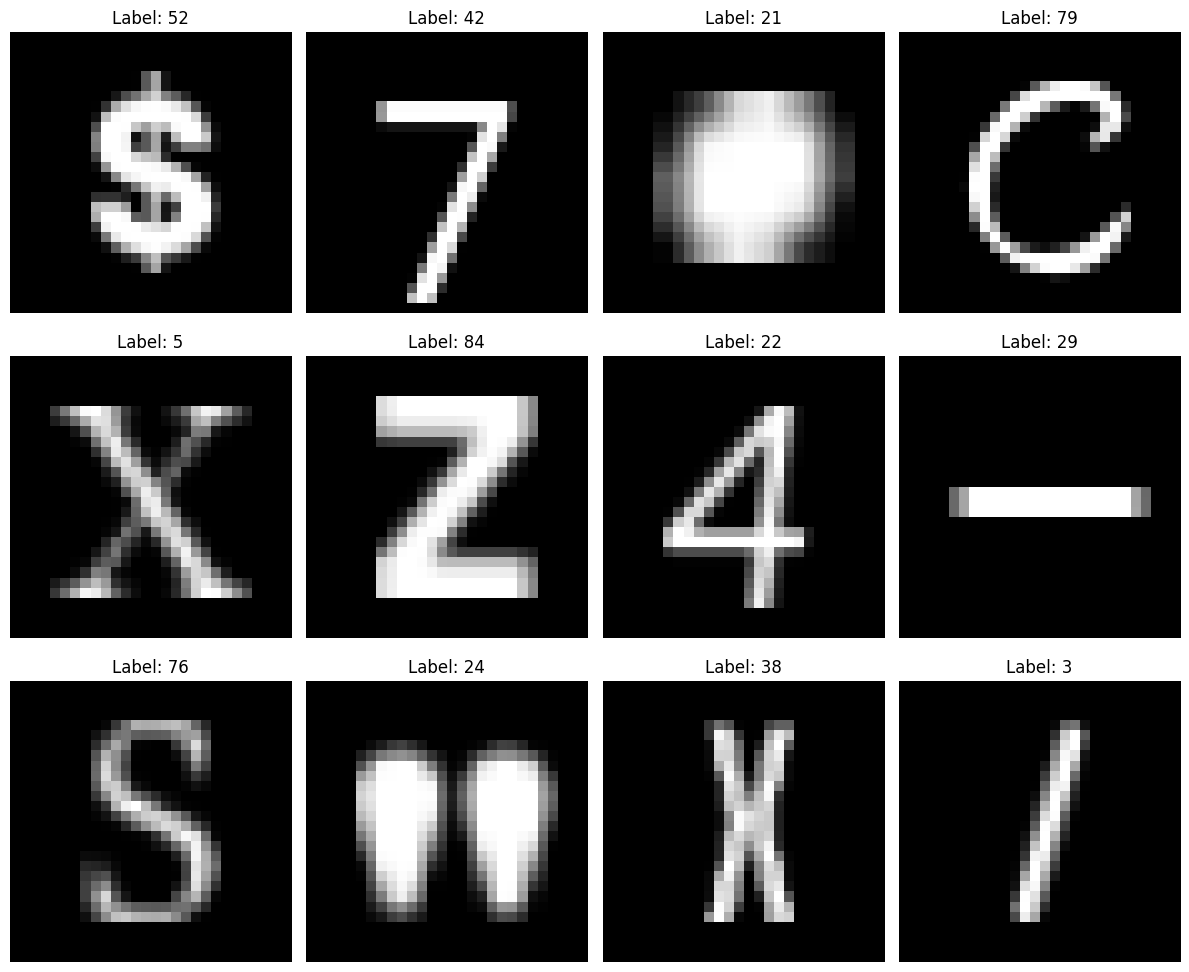

In [10]:
# Randomly shuffle and display some images from the training set
fig, axes = plt.subplots(3, 4, figsize=(12, 10))
axes = axes.flatten()

for i in range(12):
    ax = axes[i]
    ax.imshow(features_train_reshaped[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {target_train.iloc[i]['labels']}")
    ax.axis('off')

plt.tight_layout()
plt.show()



**Next, the neural network model is defined. The architecture is a Convolutional Neural Network (CNN):Convolutional Layers: These layers are responsible for learning spatial hierarchies in images. The kernel (filter) size is (3, 3), and the activation function used is ReLU, which helps introduce non-linearity into the model. Each convolutional layer is followed by a MaxPooling2D layer (2x2), which reduces the dimensionality of the data, extracting the most important features.**


**Dropout: Dropout is used after each convolutional layer and fully connected layer to prevent overfitting. It randomly disables a fraction (e.g., 25%, 50%)** **of neurons during training, which helps the model generalize better.**

**Flatten and Dense Layers: After the convolutional layers, the model is flattened to a 1D vector, which is passed through dense layers.** **The first dense layer has 512 neurons, and the second dense layer has num_classes neurons (one for each class). The activation function for the output layer is softmax, which is used for multi-class classification.** **Softmax converts the output to a probability distribution.**

In [11]:
# Number of classes in the target
num_classes = len(target_train['labels'].unique())

# Define the CNN model
model = Sequential()

# First Conv Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Second Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Third Conv Layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Summary of the model architecture
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 94)             │        48,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 731,230 (2.79 MB)

 Trainable params: 731,230 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

**The model is compiled with the Adam optimizer and categorical crossentropy loss function:**

**Optimizer: The Adam optimizer is used with a learning rate of 0.001. Adam combines the benefits of two other popular optimizers: AdaGrad and RMSProp. It adapts the learning rate for each parameter, which helps improve training speed and stability.**

**Loss Function: The loss function is categorical crossentropy, suitable for multi-class classification problems. It measures the difference between the predicted probabilities and the actual labels.**

**Early Stopping: An early stopping callback is used to prevent overfitting by halting training if the validation loss does not improve for 5 consecutive epochs.**

In [12]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


**The model was trained over 10 epochs, showing steady improvement. In the first epoch, training accuracy started at 78.79% and validation accuracy at 90.08%. By epoch 10, training accuracy reached 91.88%, while validation accuracy increased to 93.51%. Training loss decreased from 0.7334 to 0.2514, and validation loss dropped from 0.3066 to 0.1947, indicating effective learning and generalization.**
**After training, the model achieved a test accuracy of 93.44% and test loss of 0.1962, showing strong performance on unseen data. These results suggest that the model learned well and can make accurate predictions without overfitting.**g.

In [13]:
# Train the model
history = model.fit(features_train_reshaped, target_train_categorical,
                    validation_data=(features_test_reshaped, target_test_categorical),
                    epochs=10, batch_size=64, callbacks=[early_stop], verbose=2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(features_test_reshaped, target_test_categorical)
print(f'Test accuracy: {test_acc * 100:.2f}%')


Epoch 1/10
3427/3427 - 195s - 57ms/step - accuracy: 0.7879 - loss: 0.7334 - val_accuracy: 0.9008 - val_loss: 0.3066
Epoch 2/10
3427/3427 - 191s - 56ms/step - accuracy: 0.8844 - loss: 0.3726 - val_accuracy: 0.9196 - val_loss: 0.2509
Epoch 3/10
3427/3427 - 191s - 56ms/step - accuracy: 0.8995 - loss: 0.3218 - val_accuracy: 0.9233 - val_loss: 0.2283
Epoch 4/10
3427/3427 - 201s - 59ms/step - accuracy: 0.9066 - loss: 0.2957 - val_accuracy: 0.9303 - val_loss: 0.2177
Epoch 5/10
3427/3427 - 202s - 59ms/step - accuracy: 0.9114 - loss: 0.2820 - val_accuracy: 0.9328 - val_loss: 0.2052
Epoch 6/10
3427/3427 - 189s - 55ms/step - accuracy: 0.9130 - loss: 0.2725 - val_accuracy: 0.9300 - val_loss: 0.2080
Epoch 7/10
3427/3427 - 189s - 55ms/step - accuracy: 0.9150 - loss: 0.2637 - val_accuracy: 0.9332 - val_loss: 0.2002
Epoch 8/10
3427/3427 - 189s - 55ms/step - accuracy: 0.9167 - loss: 0.2574 - val_accuracy: 0.9343 - val_loss: 0.1970
Epoch 9/10
3427/3427 - 189s - 55ms/step - accuracy: 0.9181 - loss: 0.254

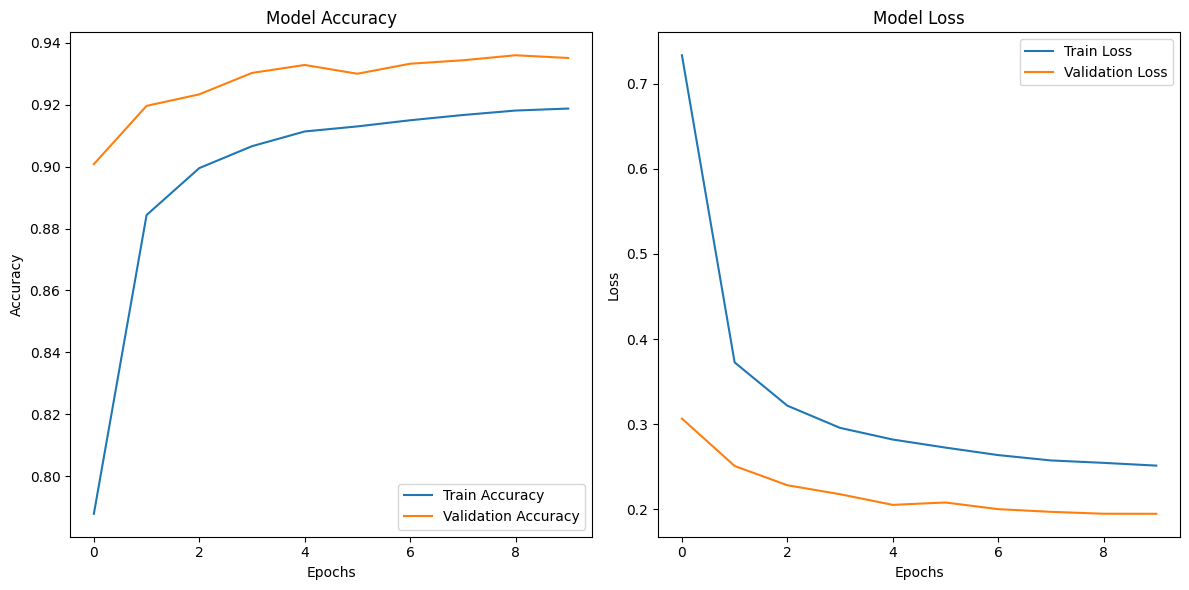

In [14]:
# Plotting accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualizing the history of training
plot_history(history)


**Key Observations:**

**Accuracy Curves:**


**Training Accuracy: The training accuracy steadily increases over the epochs, reaching a peak around 0.94. This indicates that the model is learning effectively from the training data.**

**Validation Accuracy: The validation accuracy also increases, but it does not follow the same trajectory as the training accuracy. There's a slight gap between the two curves, suggesting some overfitting. However, the validation accuracy is still high, indicating that the model generalizes well to unseen data.**

**Loss Curves:**

**Training Loss: The training loss decreases significantly over the epochs, reaching a low point around 0.2. This indicates that the model is learning to make accurate predictions on the training data.**

**Validation Loss: The validation loss also decreases, but it starts to plateau around epoch 6. This suggests that the model might be starting to overfit, as it is not improving significantly on the validation data.**

**Overall, the model exhibits good performance on both training and validation data, with a slight tendency towards overfitting.**


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


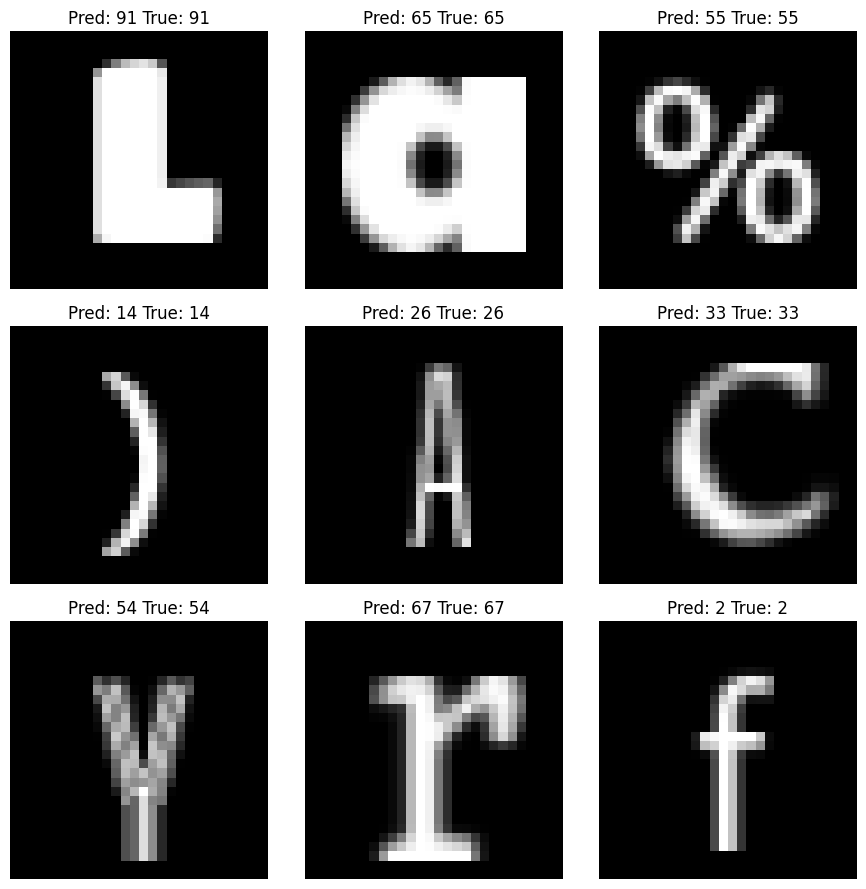

In [15]:
# Visualizing predictions on test data
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = features_test_reshaped[i].reshape(1, 28, 28, 1)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    ax.imshow(features_test_reshaped[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predicted_label} True: {target_test.iloc[i]['labels']}")
    ax.axis('off')

plt.tight_layout()
plt.show()


**Conclusion:**

**In this project, a Convolutional Neural Network (CNN) was successfully developed to perform image classification, achieving a test accuracy of 93.44%. Key preprocessing steps, such as data normalization and label encoding, ensured the data was well-prepared for training. The CNN architecture, with multiple convolutional layers, effectively learned relevant features from the data, and the steady reduction in loss demonstrated the model’s ability to generalize well. The results highlight the model’s strong performance and its ability to make accurate predictions on unseen data. Future work could focus on further hyperparameter tuning and experimenting with deeper architectures to improve model performance.**
